In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
balanced_df = pd.read_csv('/content/drive/MyDrive/balanced_data.csv')
balanced_df.shape

(762583, 34)

In [5]:
balanced_df['Attack Number'].unique()

array([0, 4, 3, 7, 2, 8, 1])

In [6]:
# Check unique labels and their counts
print("Label distribution:")
print(balanced_df['Attack Number'].value_counts().sort_index())

# Ensure labels are 0-indexed and continuous
balanced_df['Attack Number'] = balanced_df['Attack Type'].astype('category').cat.codes
print("\nCorrected labels:")
print(balanced_df['Attack Number'].value_counts().sort_index())

Label distribution:
Attack Number
0    200000
1     50000
2     50000
3    128016
4    193748
7     90819
8     50000
Name: count, dtype: int64

Corrected labels:
Attack Number
0    200000
1     50000
2     50000
3    128016
4    193748
5     90819
6     50000
Name: count, dtype: int64


In [7]:

attack_counts = balanced_df.groupby('Attack Type')['Attack Number'].agg(['count', 'unique']).reset_index()
attack_counts


,Attack Type,count,unique
0,BENIGN,200000,[0]
1,Bot,50000,[1]
2,Brute Force,50000,[2]
3,DDoS,128016,[3]
4,DoS,193748,[4]
5,Port Scan,90819,[5]
6,Web Attack,50000,[6]


from matplotlib import pyplot as plt
attack_counts['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
attack_counts.groupby('Attack Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
attack_counts['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(attack_counts['Attack Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(attack_counts, x='count', y='Attack Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

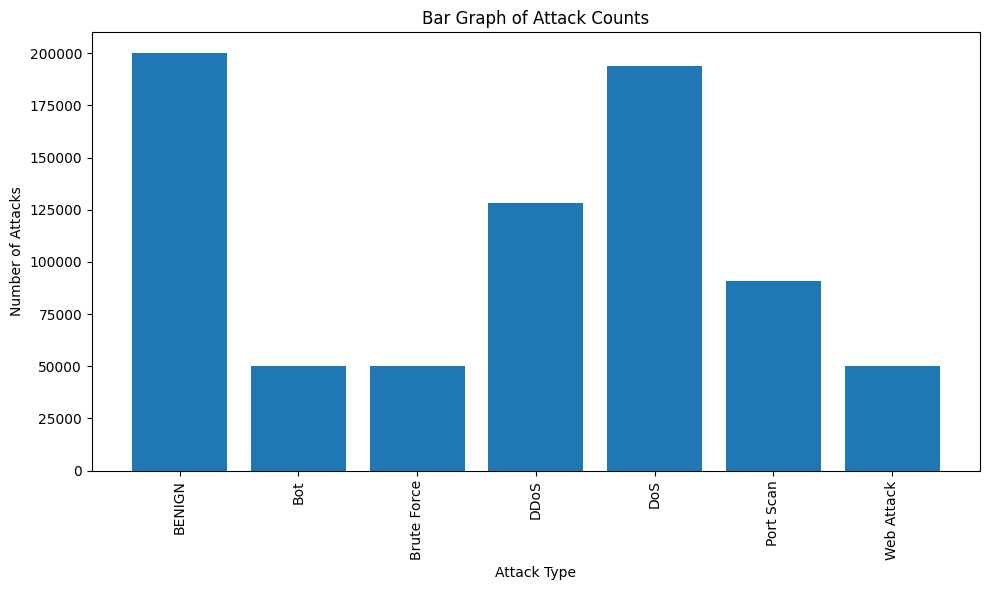

In [10]:
import matplotlib.pyplot as plt

# Assuming 'attack_counts' DataFrame from the previous code is available

plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.bar(attack_counts['Attack Type'], attack_counts['count'])
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.title('Bar Graph of Attack Counts')
plt.xticks(rotation=90) # Rotate x-axis labels for better visibility if needed
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [11]:
from sklearn.utils import shuffle

# Shuffle the entire dataset while preserving feature-label relationships
balanced_df = shuffle(balanced_df, random_state=42)

# Verify shuffle
print(balanced_df['Attack Type'].head(10))  # Should show mixed classes

327513            DoS
695518    Brute Force
95838          BENIGN
280286            DoS
320022            DoS
93475          BENIGN
718112     Web Attack
669333            Bot
611100      Port Scan
169116         BENIGN
Name: Attack Type, dtype: object


In [13]:

attack_counts11 = balanced_df.groupby('Attack Type')['Attack Number'].agg(['count', 'unique']).reset_index()
attack_counts11


,Attack Type,count,unique
0,BENIGN,200000,[0]
1,Bot,50000,[1]
2,Brute Force,50000,[2]
3,DDoS,128016,[3]
4,DoS,193748,[4]
5,Port Scan,90819,[5]
6,Web Attack,50000,[6]


In [14]:
balanced_df.head(-10)

,Flow Duration,Bwd Packet Length Max,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,...,Avg Bwd Segment Size,Init_Win_bytes_forward,Active Mean,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack Number,Attack Type
327513,69155560,4344,1449.375000,1729.380148,5.762963e+06,1.990000e+07,69000000,1,69000000,1.720000e+07,...,1449.375000,0,10996.0,10996,69000000.0,0.0,69000000,69000000,4,DoS
695518,12629111,976,85.781250,220.240592,2.428675e+05,6.618727e+05,2509237,16,10900000,5.457126e+05,...,85.781250,29200,0.0,0,0.0,0.0,0,0,2,Brute Force
95838,5904238,1493,552.625000,690.541803,3.280132e+05,1.319836e+06,5615778,2,5904238,5.904238e+05,...,552.625000,29200,288458.0,288458,5615778.0,0.0,5615778,5615778,0,BENIGN
280286,98685972,2907,1656.428571,1549.451931,8.223831e+06,2.850000e+07,98600000,2,98600000,1.970000e+07,...,1656.428571,0,14006.0,14006,98600000.0,0.0,98600000,98600000,4,DoS
320022,85644076,8688,1932.500000,3506.021777,8.564408e+06,2.700000e+07,85500000,50,85500000,2.140000e+07,...,1932.500000,0,9001.0,9001,85500000.0,0.0,85500000,85500000,4,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278167,98239676,5792,1932.500000,2181.008184,7.556898e+06,2.720000e+07,98200000,0,98200000,1.400000e+07,...,1932.500000,274,984.0,984,98200000.0,0.0,98200000,98200000,4,DoS
191335,5176629,0,0.000000,0.000000,1.725543e+06,2.975673e+06,5161543,57,5176629,2.588314e+06,...,0.000000,29200,0.0,0,0.0,0.0,0,0,0,BENIGN
175203,23786,211,211.000000,0.000000,7.928667e+03,1.368784e+04,23734,4,48,4.800000e+01,...,211.000000,-1,0.0,0,0.0,0.0,0,0,0,BENIGN
87498,51,2,2.000000,0.000000,1.700000e+01,1.345362e+01,28,2,51,5.100000e+01,...,2.000000,0,0.0,0,0.0,0.0,0,0,0,BENIGN


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  # Optional scaling

# Assuming balanced_df is already loaded and preprocessed

# 1. Separate features (X) and labels (y)
X = balanced_df.drop(['Attack Type', 'Attack Number'], axis=1)
y = balanced_df['Attack Number']

# 2. Optional: Scale the features to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-test split (with stratified class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,  # Use X instead of X_scaled if you don't want scaling
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintains class balance in train and test sets
)

# 4. Reshape data for TSANet input: (samples, timesteps, features)
X_train = X_train.reshape(-1, 32, 1)
X_test = X_test.reshape(-1, 32, 1)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (610066, 32, 1), Test shape: (152517, 32, 1)


In [16]:
import tensorflow as tf
!pip install -q tensorflow-model-optimization
import tensorflow_model_optimization as tfmot
from sklearn.utils.class_weight import compute_class_weight
import numpy as np



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 101.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [17]:
def build_tsanet(input_shape=(32,1), num_classes=7):
    inputs = tf.keras.Input(shape=input_shape)

    # Spatial Attention
    x = tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu')(inputs)
    spatial_att = tf.keras.layers.Conv1D(1, 1, activation='sigmoid')(x)
    spatial_out = tf.keras.layers.Multiply()([x, spatial_att])

    # Temporal Attention
    temporal_att = tf.keras.layers.LSTM(32, return_sequences=True)(x)
    temporal_att = tf.keras.layers.Dense(1, activation='softmax')(temporal_att)
    temporal_out = tf.keras.layers.Multiply()([x, temporal_att])

    # Merge
    x = tf.keras.layers.Concatenate()([spatial_out, temporal_out])
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LSTM(64)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    return tf.keras.Model(inputs=inputs, outputs=outputs)


In [18]:
# Make sure X_train, X_test, y_train, y_test are already loaded
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

num_classes = 7


Train shape: (610066, 32, 1), Test shape: (152517, 32, 1)


In [19]:
model = build_tsanet(input_shape=(32, 1), num_classes=num_classes)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Training
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=256,
    class_weight=class_weight_dict,
    callbacks=callbacks
)


Epoch 1/10
2384/2384 [==============================] - 36s 12ms/step - loss: 0.3434 - accuracy: 0.8662 - val_loss: 0.2798 - val_accuracy: 0.9120 - lr: 0.0010
Epoch 2/10
2384/2384 [==============================] - 27s 11ms/step - loss: 0.1165 - accuracy: 0.9519 - val_loss: 0.9051 - val_accuracy: 0.7489 - lr: 0.0010
Epoch 3/10
2384/2384 [==============================] - 27s 11ms/step - loss: 0.0815 - accuracy: 0.9665 - val_loss: 0.2018 - val_accuracy: 0.9264 - lr: 0.0010
Epoch 4/10
2384/2384 [==============================] - 26s 11ms/step - loss: 0.0659 - accuracy: 0.9724 - val_loss: 0.0805 - val_accuracy: 0.9757 - lr: 0.0010
Epoch 5/10
2384/2384 [==============================] - 27s 11ms/step - loss: 0.0582 - accuracy: 0.9755 - val_loss: 0.0792 - val_accuracy: 0.9748 - lr: 0.0010
Epoch 6/10
2384/2384 [==============================] - 26s 11ms/step - loss: 0.0527 - accuracy: 0.9776 - val_loss: 0.0765 - val_accuracy: 0.9759 - lr: 0.0010
Epoch 7/10
2384/2384 [========================

In [20]:
# Optional: If you've used pruning before, clean it up
model = tfmot.sparsity.keras.strip_pruning(model)


In [22]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Fix 1: Enable resource variables
converter.experimental_enable_resource_variables = True

# Fix 2: Allow select TF ops (needed for LSTM and attention layers)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,       # Allow standard TFLite ops
    tf.lite.OpsSet.SELECT_TF_OPS          # Enable Select TF ops (for LSTM etc.)
]

# Optional: Quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Optional: Avoid aggressive tensor list lowering that breaks LSTM
converter._experimental_lower_tensor_list_ops = False

# Convert
tflite_model = converter.convert()

# Save the model
with open('tsanet_final_quant.tflite', 'wb') as f:
    f.write(tflite_model)

print("✅ Model converted with LSTM support and saved as 'tsanet_final_quant.tflite'")


✅ Model converted with LSTM support and saved as 'tsanet_final_quant.tflite'


In [23]:
# Optional: Quick way to test if the model runs via TFLite Interpreter
interpreter = tf.lite.Interpreter(model_path="tsanet_final_quant.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test on a single sample
sample = X_test[0:1].astype(np.float32)
interpreter.set_tensor(input_details[0]['index'], sample)
interpreter.invoke()
output = interpreter.get_tensor(output_details[0]['index'])

predicted_class = np.argmax(output)
print("Predicted class index:", predicted_class)


Predicted class index: 3


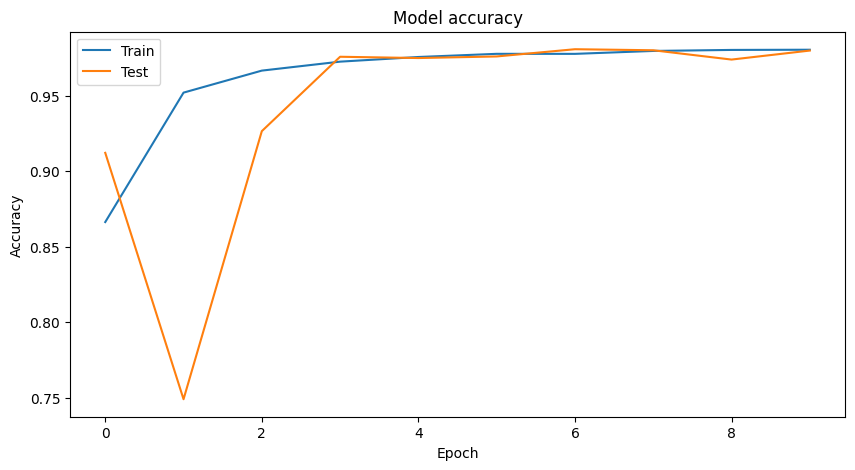

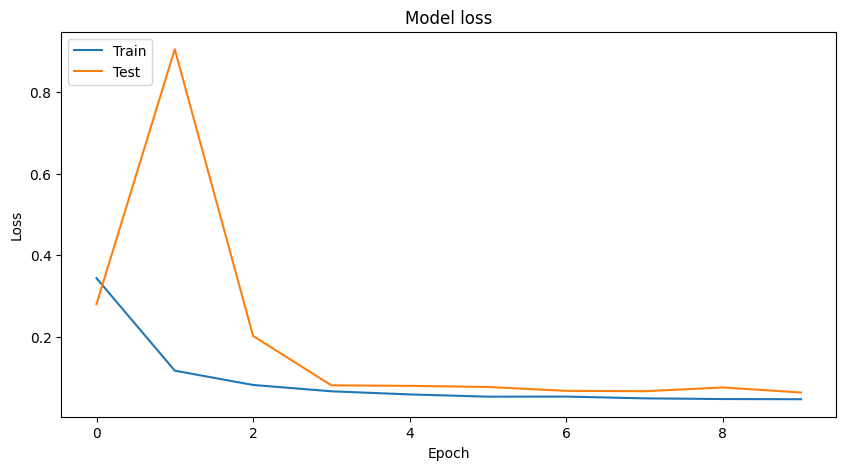

In [24]:
# prompt: accuray vs loss graph

import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
